<a href="https://colab.research.google.com/github/karti358/image_captioning/blob/main/notebooks/captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasets:

1. [IAPR TC-12](http://www-i6.informatik.rwth-aachen.de/imageclef/resources/iaprtc12.tgz)

2. [Flickr8K](https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip)

3. [Flickr30](https://www.kaggle.com/datasets/hsankesara/flickr-image-dataset)

4. [MS COCO](https://cocodataset.org/#download)

In [ ]:
!wget http://www-i6.informatik.rwth-aachen.de/imageclef/resources/iaprtc12.tgz
!tar -xvf iaprtc12.tgz

In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET

In [36]:
def extract_description(xml_file):
    # Parse the XML file
    try:
      tree = ET.parse(xml_file)
    except Exception as e:
      print(f"error in parsing tree - {xml_file}", e)
      return None

    root = tree.getroot()

    # Iterate through each <DESCRIPTION> tag
    description = root.find('DESCRIPTION')
    return description

data = []

main_dir = os.getcwd()
for dir in sorted(os.listdir(os.path.join(main_dir, "iaprtc12/images"))):
  for f in sorted(os.listdir(os.path.join(main_dir, "iaprtc12/images/" + dir))):

    image_path = os.path.join(main_dir, "iaprtc12/images/" + dir + "/" + f)
    annot_path = os.path.join(main_dir, "iaprtc12/annotations_complete_eng/" + dir + "/" + f.split(".")[0] + ".eng")
    ele = extract_description(annot_path)

    if ele is None:
      continue

    data.append((
        image_path,
        ele.text
    ))
print(len(data))

17590


About 20 kids in traditional clothing and hats waiting on stairs; a house and a green wall with gate in the background; a sign saying that plants can't be picked up on the right;


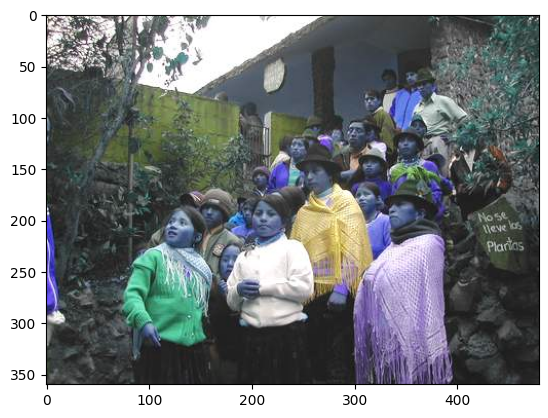

In [40]:
img_path, text = data[0]
img = cv2.imread(img_path)
plt.imshow(img)
print(text)

In [ ]:
import torch
!pip install pytorch_lightning
import pytorch_lightning as pl

In [41]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:06<00:00, 38.0MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [45]:
model = torch.nn.Sequential(
    model.features,
    model.avgpool,
    model.classifier[:5]
)
model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): AdaptiveAvgPool2d(output_size=(6, 6))
  (2): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplac

In [ ]:
class

In [ ]:
class m_RNN(pl.LightningModule):
  def _init__(self, m_size, w_size, r_size, i_size):
    self.linear_rnn = torch.nn.Linear(
        in_features = r_size,
        out_features = w_size,
        bias = False
    )

    self.relu = torch.nn.ReLU()

    self.linear_w = torch.nn.Linear(
        in_features = w_size,
        out_features = m_size,
        bias = False
    )

    self.linear_r = torch.nn.Linear(
        in_features = r_size,
        out_features = m_size,
        bias = False
    )

    self.linear_i = torch.nn.Linear(
        in_features = i_size,
        out_features = m_size,
        bias = False
    )

    self.tanh = torch.nn.Tanh()

    self.softmax = torch.nn.Softmax(dim = 2)

  def forward(self, ws, r, i):
    i = torch.unsqueeze(i, 1)

    ret_probs = []
    samples = ws.shape[1]
    for i in range(samples):
      r = self.relu(self.linear_rnn(r), + ws[:, i:i+1, :])

      m = 1.7159 * self.tanh(self.linear_w(ws[:, i:i+1, :]) + self.linear_r(r) + self.linear_i(i))

      ret_probs.append(self.softmax(m))

    return torch.cat(ret_probs, dim = 1)

class LitNeuralNet(pl.LightningModule):
    def __init__(self, input_size, hidden_size, num_classes, vocab_size = 15000):
        super(LitNeuralNet, self).__init__()

        temp_model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
        self.image_model = torch.nn.Sequential(
            temp_model.features,
            temp_model.avgpool,
            temp_model.classifier[:5]
        )

        self.embedding = torch.nn.Sequential(
            torch.nn.Embedding(
                vocab_size,
                128,
                padding_idx = pad
            ),
            torch.nn.Linear(
                in_features = 128,
                out_features = hidden_size,
                bias = False
            )
        )

    def forward(self, x, x_, ):


    def training_step(self, batch, batch_idx):
        images, labels = batch
        images = images.reshape(-1, 28 * 28)

        # Forward pass
        outputs = self(images)
        loss = F.cross_entropy(outputs, labels)

        tensorboard_logs = {'train_loss': loss}
        # use key 'log'
        return {"loss": loss, 'log': tensorboard_logs}

    # define what happens for testing here

    def train_dataloader(self):
        # MNIST dataset
        train_dataset = torchvision.datasets.MNIST(
            root="./data", train=True, transform=transforms.ToTensor(), download=True
        )
        # Data loader
        train_loader = torch.utils.data.DataLoader(
            dataset=train_dataset, batch_size=batch_size, num_workers=4, shuffle=False
        )
        return train_loader

    def val_dataloader(self):
        test_dataset = torchvision.datasets.MNIST(
            root="./data", train=False, transform=transforms.ToTensor()
        )

        test_loader = torch.utils.data.DataLoader(
            dataset=test_dataset, batch_size=batch_size, num_workers=4, shuffle=False
        )
        return test_loader

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        images = images.reshape(-1, 28 * 28)

        # Forward pass
        outputs = self(images)

        loss = F.cross_entropy(outputs, labels)
        return {"val_loss": loss}

    # def on_validation_epoch_end(self):
    #     # outputs = list of dictionaries
    #     avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
    #     tensorboard_logs = {'avg_val_loss': avg_loss}
    #     print(avg_loss)
    #     # use key 'log'


    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=learning_rate)